# Deep Learning @LaPlat / CBPF

## LAB 3

# Image classification Galaxy10 DECals using CNN from AstroNN Package


# importing astroNN
# it is package Astro Neural Net i.e. https://astronn.readthedocs.io/en/stable/

In [ ]:
#!pip install astroNN # install astroNN package i.e. https://astronn.readthedocs.io/en/stable/
!pip install tensorflow
!pip install tensorflow_probability
!pip install git+https://github.com/henrysky/astroNN.git
!pip install astroNN # install astroNN package i.e. https://astronn.readthedocs.io/en/stable/

  Cloning https://github.com/henrysky/astroNN.git to /tmp/pip-req-build-fqcxszqm
  Running command git clone --filter=blob:none --quiet https://github.com/henrysky/astroNN.git /tmp/pip-req-build-fqcxszqm
  Resolved https://github.com/henrysky/astroNN.git to commit 264d65216a32b76f734dfd1d6f25c6ea506af3dd
  Preparing metadata (setup.py) ... done


# Load Data

##Galaxy10 dataset (17736 images)
##├── Class 0 (1081 images): Disturbed Galaxies
##├── Class 1 (1853 images): Merging Galaxies
##├── Class 2 (2645 images): Round Smooth Galaxies
##├── Class 3 (2027 images): In-between Round Smooth Galaxies
##├── Class 4 ( 334 images): Cigar Shaped Smooth Galaxies
##├── Class 5 (2043 images): Barred Spiral Galaxies
##├── Class 6 (1829 images): Unbarred Tight Spiral Galaxies
##├── Class 7 (2628 images): Unbarred Loose Spiral Galaxies
##├── Class 8 (1423 images): Edge-on Galaxies without Bulge
##└── Class 9 (1873 images): Edge-on Galaxies with Bulge


In [ ]:
# import everything we need first
import tensorflow as tf
tf.__version__
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN # import model
from astroNN.datasets import load_galaxy10sdss
from astroNN.datasets.galaxy10sdss import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = load_galaxy10sdss()
print(images.shape, labels.shape)


/root/.astroNN/datasets/Galaxy10.h5 was found!
(21785, 69, 69, 3) (21785,)


In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

# Show images

===================Data Inspection===================


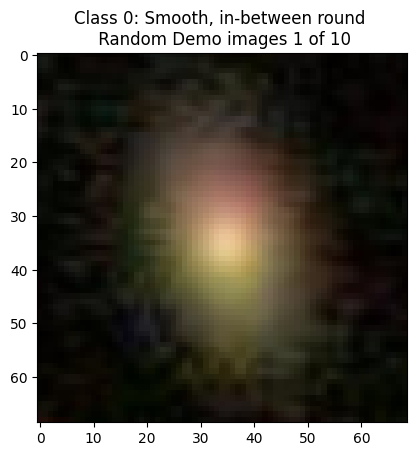

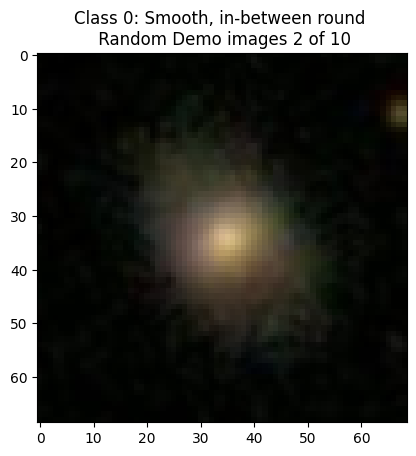

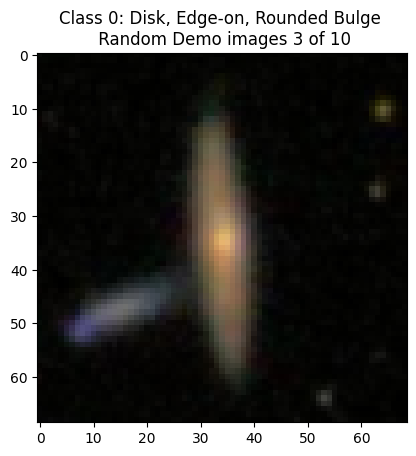

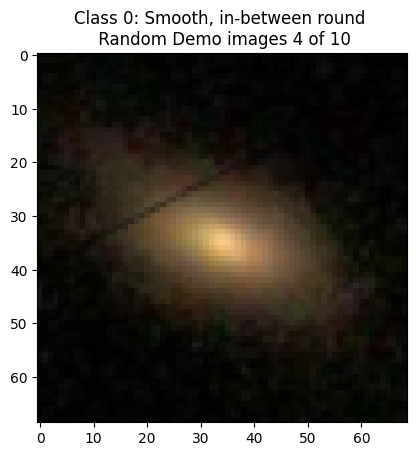

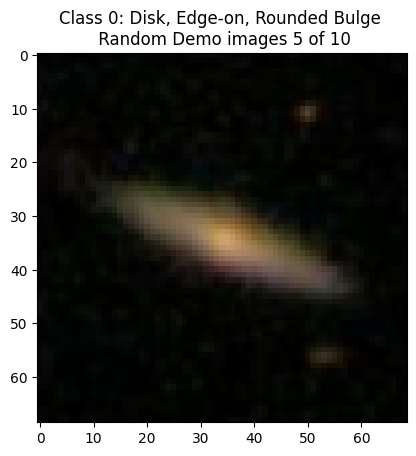

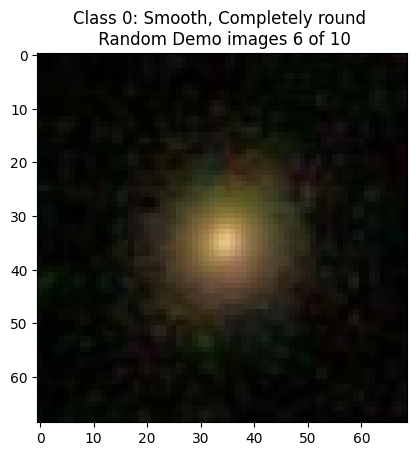

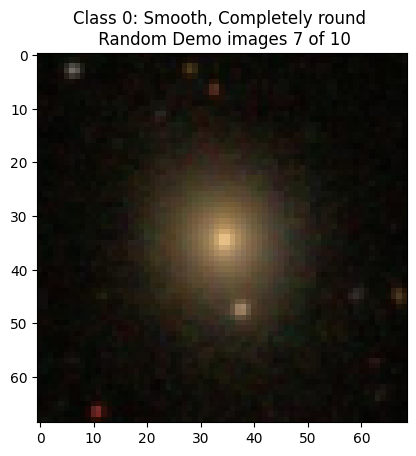

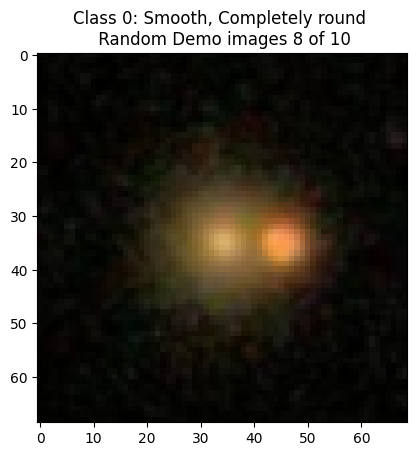

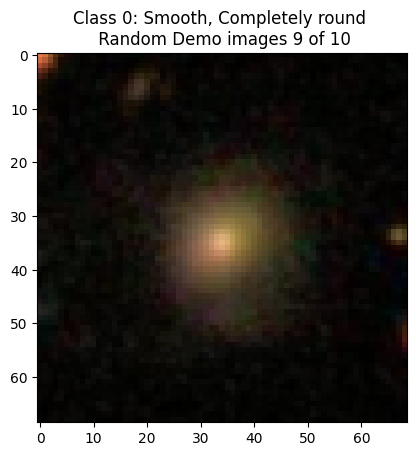

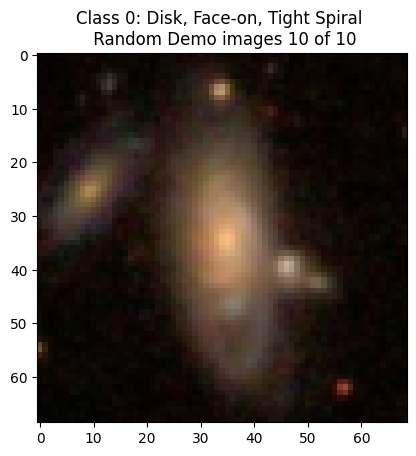

===============Data Inspection Finished===============


In [ ]:
# To convert the labels to categorical 10 classes
#labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')



# Prepare data to train - set number samples before

In [ ]:
n_samples = 21785 # set number samples, there are 21785 samples total
samples = np.random.permutation(images.shape[0])

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
labels = labels.astype(np.float32)[samples[0:n_samples],:]
images = images.astype(np.float32)[samples[0:n_samples],:,:,:]

# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_idx, val_idx = train_test_split(train_idx, test_size=0.1)
train_images, train_labels, val_images, val_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[val_idx], labels[val_idx], images[test_idx], labels[test_idx]


# Train and predict - Model

In [ ]:

# To create a neural network instance
galaxy10net = Galaxy10CNN()

# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 5

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)





<ipython-input-6-f1ad021f6666>:9: UserWarning: Call to function train() is deprecated and will be removed in future. Use fit() instead.


Number of Training Data: 15881, Number of Validation Data: 1764
====Message from Normalizer====
You selected mode: 255
Featurewise Center: {'input': False}
Datawise Center: {'input': False} 
Featurewise std Center: {'input': False}
Datawise std Center: {'input': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: {'output': False}
Datawise Center: {'output': False} 
Featurewise std Center: {'output': False}
Datawise std Center: {'output': False} 
====Message ends====
Epoch 1/5
248/248 - 98s - loss: 1.5626 - categorical_accuracy: 0.3826 - val_loss: 1.3099 - val_categorical_accuracy: 0.4873 - lr: 0.0050 - 98s/epoch - 397ms/step
Epoch 2/5
248/248 - 98s - loss: 1.3172 - categorical_accuracy: 0.4857 - val_loss: 1.1785 - val_categorical_accuracy: 0.5596 - lr: 0.0050 - 98s/epoch - 394ms/step
Epoch 3/5
248/248 - 91s - loss: 1.2040 - categorical_accuracy: 0.5553 - val_loss: 1.1112 - val_categorical_accuracy: 0.5961 - lr: 0.0050 - 91s/epoch - 368

<ipython-input-6-f1ad021f6666>:16: UserWarning: Call to function test() is deprecated and will be removed in future. Use predict() instead.
Prediction progress: 100%|██████████| 2179/2179 [00:05<00:00, 400.29sample/s]


## ROC Results

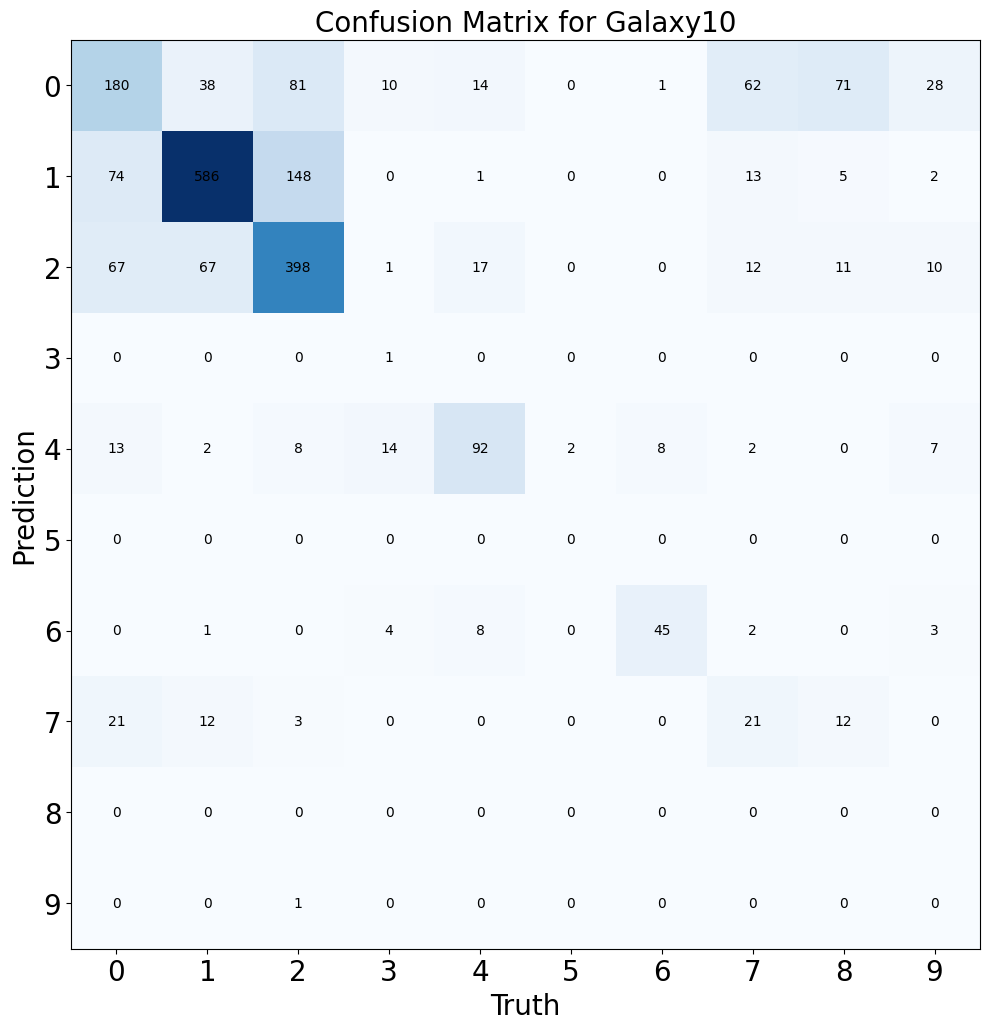

In [ ]:
# Convert test_labels (categorical) to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)

# Test your knowledge

## Make ROC per classes and check the results.